In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('../data/BankA.csv')
print(df.head())

  institute  age         workclass  education  educational-num  \
0    Bank A   39           Private  Bachelors               13   
1    Bank A   42           Private  Bachelors               13   
2    Bank A   34  Self-emp-not-inc    Masters               14   
3    Bank A   74       Federal-gov  Bachelors               13   
4    Bank A   48           Private    Masters               14   

       marital-status       occupation relationship   race gender  \
0  Married-civ-spouse  Exec-managerial      Husband  White   Male   
1  Married-civ-spouse     Tech-support      Husband  White   Male   
2  Married-civ-spouse            Sales      Husband  White   Male   
3  Married-civ-spouse   Prof-specialty      Husband  White   Male   
4  Married-civ-spouse  Exec-managerial      Husband  White   Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          7298             0              50  United-States   >50K  
1             0             0              55  U

In [13]:
df = df.replace("?", pd.NA)
df["income"] = df["income"].astype(str).str.strip()
df["income"] = df["income"].str.contains(">50K").astype(int)
num_cols = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_cols = [col for col in df.columns if col not in num_cols + ["income"]]
df[cat_cols] = df[cat_cols].fillna("Unknown")

X = df.drop("income", axis=1)
y = df["income"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_train_proc = preprocess.fit_transform(X_train)
X_test_proc = preprocess.transform(X_test)


In [14]:
input_dim = X_train_proc.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model.evaluate(X_test_proc, y_test, verbose=0)

y_pred_prob = model.predict(X_test_proc)
y_pred = (y_pred_prob > 0.5).astype(int)

c:\Users\julia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8177 - loss: 0.3902 - val_accuracy: 0.8272 - val_loss: 0.3730
Epoch 2/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.8272 - loss: 0.3731 - val_accuracy: 0.8267 - val_loss: 0.3680
Epoch 3/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8285 - loss: 0.3705 - val_accuracy: 0.8294 - val_loss: 0.3665
Epoch 4/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8296 - loss: 0.3684 - val_accuracy: 0.8264 - val_loss: 0.3715
Epoch 5/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8308 - loss: 0.3675 - val_accuracy: 0.8291 - val_loss: 0.3671
Epoch 6/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8304 - loss: 0.3672 - val_accuracy: 0.8294 - val_loss: 0.3675
Epoch 7/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8305 - loss: 0.3660 - val_accuracy: 0.8277 - val_loss: 0.3690
Epoch 8/50
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8316 - loss: 0.365

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy:  0.8315
F1-Score:  0.7665
ROC-AUC:   0.9093


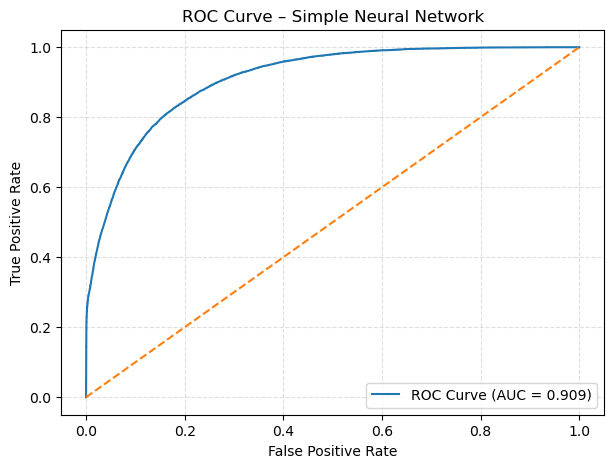

In [10]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Simple Neural Network")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
